<a href="https://colab.research.google.com/github/dquangucsd/Lab2_Starter/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L -o ./classical-music-midi.zip\
  https://www.kaggle.com/api/v1/datasets/download/soumikrakshit/classical-music-midi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2388k  100 2388k    0     0  1192k      0  0:00:02  0:00:02 --:--:-- 2347k


In [2]:
!ls midis

ls: cannot access 'midis': No such file or directory


In [3]:
!mkdir midis

In [4]:
!ls midis

In [5]:
!mv classical-music-midi.zip midis/

In [6]:
!ls midis

classical-music-midi.zip


In [7]:
!unzip ./midis/classical-music-midi.zip

Archive:  ./midis/classical-music-midi.zip
  inflating: albeniz/alb_esp1.mid    
  inflating: albeniz/alb_esp2.mid    
  inflating: albeniz/alb_esp3.mid    
  inflating: albeniz/alb_esp4.mid    
  inflating: albeniz/alb_esp5.mid    
  inflating: albeniz/alb_esp6.mid    
  inflating: albeniz/alb_se1.mid     
  inflating: albeniz/alb_se2.mid     
  inflating: albeniz/alb_se3.mid     
  inflating: albeniz/alb_se4.mid     
  inflating: albeniz/alb_se5.mid     
  inflating: albeniz/alb_se6.mid     
  inflating: albeniz/alb_se7.mid     
  inflating: albeniz/alb_se8.mid     
  inflating: bach/bach_846.mid       
  inflating: bach/bach_847.mid       
  inflating: bach/bach_850.mid       
  inflating: balakir/islamei.mid     
  inflating: beeth/appass_1.mid      
  inflating: beeth/appass_2.mid      
  inflating: beeth/appass_3.mid      
  inflating: beeth/beethoven_hammerklavier_1.mid  
  inflating: beeth/beethoven_hammerklavier_2.mid  
  inflating: beeth/beethoven_hammerklavier_3.mid  
  infl

In [8]:
from glob import glob

In [9]:
midi_files = glob('chopin/*.mid')

In [10]:
len(midi_files)

48

In [2]:
# !pip install tensorflow


In [3]:
# !pip install music21

In [4]:
# !pip install seaborn

In [5]:
# !pip install pydot

In [15]:
#Importing Libraries
import tensorflow
import numpy as np
import pandas as pd
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax, Adam
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [16]:
!which lilypond

In [17]:
import os

In [18]:
from tqdm import tqdm

In [19]:
#Loading the list of chopin's midi files as stream
filepath = "./chopin/"
#Getting midi files
all_midis= []
for i in tqdm(os.listdir(filepath)):
    if i.endswith(".mid"):
        tr = filepath+i
        try:
            midi = converter.parse(tr)
        except Exception as e:
            print(f"Error parsing {tr}: {e}")
            continue
        all_midis.append(midi)

100%|██████████| 48/48 [02:31<00:00,  3.15s/it]


In [20]:
print(len(all_midis))
print(all_midis)

48
[<music21.stream.Score 0x7b9d17109150>, <music21.stream.Score 0x7b9d165055d0>, <music21.stream.Score 0x7b9d1730dd50>, <music21.stream.Score 0x7b9d13c2ad90>, <music21.stream.Score 0x7b9d15001590>, <music21.stream.Score 0x7b9d10201150>, <music21.stream.Score 0x7b9d162113d0>, <music21.stream.Score 0x7b9d13c01810>, <music21.stream.Score 0x7b9d0fb00710>, <music21.stream.Score 0x7b9d0e607890>, <music21.stream.Score 0x7b9d16e04810>, <music21.stream.Score 0x7b9d1122af10>, <music21.stream.Score 0x7b9d0ee11810>, <music21.stream.Score 0x7b9d1452c2d0>, <music21.stream.Score 0x7b9d1632ca90>, <music21.stream.Score 0x7b9d0c105f50>, <music21.stream.Score 0x7b9d0c861110>, <music21.stream.Score 0x7b9d0780a310>, <music21.stream.Score 0x7b9d06783d50>, <music21.stream.Score 0x7b9d0cd08790>, <music21.stream.Score 0x7b9d05357fd0>, <music21.stream.Score 0x7b9d05c10a90>, <music21.stream.Score 0x7b9d02e03990>, <music21.stream.Score 0x7b9d02b05e10>, <music21.stream.Score 0x7b9d14266050>, <music21.stream.Score

In [21]:
print(instrument)

<module 'music21.instrument' from '/usr/local/lib/python3.11/dist-packages/music21/instrument.py'>


In [22]:
!where instrument

/bin/bash: line 1: where: command not found


In [1]:
# test_midi_files = all_midis.copy()
# notes = []
# for file in all_midis:
#   try: # Added try-except for robust MIDI parsing

#     songs = instrument.partitionByInstrument(file)
#     print(f'songs: {songs}')

#     # # --- Robust instrument partitioning ---
#     # # Using 'parts' for explicit instruments, otherwise 'flat.notesAndRests'
#     for part in songs.parts:
#             pick = part.recurse()
#             print(f'pick.recurse(): {pick.recurse()}')
#             for element in pick:
#                 if isinstance(element, note.Note):
#                     notes.append(str(element.pitch))
#                     # print(f'note detected: {str(element.pitch)}')
#                 elif isinstance(element, chord.Chord):
#                     notes.append(".".join(str(n) for n in element.normalOrder))
#                     # print(f'chord detected: {".".join(str(n) for n in element.normalOrder)}')
#                 elif isinstance(element, note.Rest):
#                     notes.append("rest")
#                     # print(f'rest detected')
#   except Exception as e:
#     print(f"Warning: Could not parse MIDI file {file} due to: {e}. Skipping.")
#     continue # Skip to the next file if parsing fails

In [27]:
def extract_notes_voiced_chords_and_durations(list_of_score_objects: list, process_only_piano: bool = True) -> list[tuple[str, float]]:
    """
    Extracts notes, voiced chords (using pitch names with octaves), and rests,
    along with their durations, from a list of music21 Score objects.
    Returns a list of tuples: (event_string, duration_float).
    """
    extracted_events_with_durations: list[tuple[str, float]] = []

    for score_object in tqdm(list_of_score_objects, desc="Processing Scores"):
        try:
            parts_to_process = []
            if process_only_piano:
                instrument_partitions = instrument.partitionByInstrument(score_object)
                if instrument_partitions:
                    for part_obj in instrument_partitions.parts: # Renamed part to part_obj to avoid conflict
                        part_name_lower = ""
                        if hasattr(part_obj, 'partName') and part_obj.partName is not None:
                            part_name_lower = str(part_obj.partName).lower()
                        elif hasattr(part_obj, 'id') and part_obj.id is not None:
                            part_name_lower = str(part_obj.id).lower()
                        instrument_name_from_part = ""
                        inst = part_obj.getInstrument(returnDefault=False)
                        if inst and hasattr(inst, 'instrumentName') and inst.instrumentName:
                            instrument_name_from_part = inst.instrumentName.lower()
                        if "piano" in part_name_lower or "piano" in instrument_name_from_part:
                            parts_to_process.append(part_obj)
                if not parts_to_process:
                    main_instrument = score_object.getInstrument(returnDefault=True)
                    if main_instrument and "piano" in main_instrument.instrumentName.lower():
                        for element in score_object.flat.notesAndRests:
                            event_duration_val = element.quarterLength # Renamed duration to avoid conflict
                            event_string = None
                            if isinstance(element, note.Note):
                                event_string = element.pitch.nameWithOctave
                            elif isinstance(element, chord.Chord):
                                if element.pitches:
                                    sorted_pitches = sorted(element.pitches, key=lambda p: p.ps)
                                    event_string = ".".join(p.nameWithOctave for p in sorted_pitches)
                                else: continue # Skip empty chord
                            elif isinstance(element, note.Rest):
                                event_string = "rest"
                            if event_string is not None:
                                extracted_events_with_durations.append((event_string, float(event_duration_val)))
                        continue
            else: # Process all parts
                if hasattr(score_object, 'parts') and score_object.parts:
                    parts_to_process = score_object.parts
                else: # Fallback to flat notes if no parts structure
                     for element in score_object.flat.notesAndRests:
                        event_duration_val = element.quarterLength
                        event_string = None
                        if isinstance(element, note.Note):
                            event_string = element.pitch.nameWithOctave
                        elif isinstance(element, chord.Chord):
                            if element.pitches: # Ensure chord has pitches
                                sorted_pitches = sorted(element.pitches, key=lambda p: p.ps)
                                event_string = ".".join(p.nameWithOctave for p in sorted_pitches)
                            else: continue # Skip empty chord
                        elif isinstance(element, note.Rest):
                            event_string = "rest"
                        if event_string is not None:
                            extracted_events_with_durations.append((event_string, float(event_duration_val)))
                     continue # Move to next score object

            # Process selected parts
            for part_obj in parts_to_process: # Renamed part to part_obj
                for element in part_obj.recurse().notesAndRests:
                    event_duration_val = element.quarterLength
                    event_string = None
                    if isinstance(element, note.Note):
                        event_string = element.pitch.nameWithOctave
                    elif isinstance(element, chord.Chord):
                        if element.pitches: # Ensure chord has pitches
                            sorted_pitches = sorted(element.pitches, key=lambda p: p.ps)
                            event_string = ".".join(p.nameWithOctave for p in sorted_pitches)
                        else: continue # Skip empty chord
                    elif isinstance(element, note.Rest):
                        event_string = "rest"
                    if event_string is not None:
                        extracted_events_with_durations.append((event_string, float(event_duration_val)))
        except Exception as e:
            score_id_for_error = "unknown_score"
            if hasattr(score_object, 'id') and score_object.id: score_id_for_error = score_object.id
            if score_object.metadata and score_object.metadata.title: score_id_for_error = score_object.metadata.title
            print(f"Warning: Could not process score '{score_id_for_error}' due to: {e}. Skipping.")
            continue
    return extracted_events_with_durations

In [28]:
Corpus = extract_notes_voiced_chords_and_durations(all_midis, process_only_piano=True)

# If you wanted to process all instrument parts:
# Corpus = extract_notes_and_voiced_chords(all_midis, process_only_piano=False)

print(f"Total extracted musical events: {len(Corpus)}")
print(f"First 50 events: {Corpus[:50]}")

Processing Scores: 100%|██████████| 48/48 [00:05<00:00,  8.06it/s]

Total extracted musical events: 71266
First 50 events: [('B4', 0.25), ('rest', 0.5), ('A4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B-4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B4', 0.25), ('A2', 0.25), ('E5', 0.25), ('B4', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B-4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('A3', 0.25), ('B4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('F#4', 0.25), ('A3', 0.25), ('D4', 0.25), ('D2', 0.25)]


In [32]:
type(Corpus)

list

In [33]:
import tempfile

In [6]:
# !apt update
# !apt install -y lilypond

In [37]:
from music21 import environment
us = environment.UserSettings()
print(us.getSettingsPath())
print(us['lilypondPath'])

/root/.music21rc
/usr/bin/lilypond


In [38]:
def chords_n_notes_with_durations(snippet_of_event_duration_tuples: list[tuple[str, float]]):
    """
    Converts a list of (event_string, duration_float) tuples
    into a music21.stream.Stream object for playback or display.
    This function EXPECTS a list of tuples.
    """
    melody_stream = stream.Stream()
    current_offset = 0.0

    if not isinstance(snippet_of_event_duration_tuples, list):
        print(f"Warning: chords_n_notes_with_durations expects a list of (event_string, duration) tuples, "
              f"but received type: {type(snippet_of_event_duration_tuples)}. Returning an empty stream.")
        return melody_stream # Return an empty stream if input is not a list

    for item_tuple in snippet_of_event_duration_tuples:
        if not (isinstance(item_tuple, tuple) and len(item_tuple) == 2 and
                isinstance(item_tuple[0], str) and isinstance(item_tuple[1], (int, float))):
            print(f"Warning: Expected tuple of (string, number) for an event, "
                  f"but got: {item_tuple} (type: {type(item_tuple)}). Skipping this event.")
            continue

        event_string_repr, event_duration = item_tuple

        if not (isinstance(event_duration, (int,float)) and event_duration > 0): # Duration must be positive
            print(f"Warning: Invalid or non-positive duration '{event_duration}' for event '{event_string_repr}'. "
                  f"Using default 0.5. Original tuple: {item_tuple}")
            event_duration = 0.5

        element_to_add = None
        try:
            if "." in event_string_repr:  # Voiced Chord string (e.g., "C4.E4.G4")
                pitch_names = event_string_repr.split(".")
                notes_for_chord = [note.Note(pn) for pn in pitch_names]
                if notes_for_chord:
                    element_to_add = chord.Chord(notes_for_chord)
            elif "rest" == event_string_repr.lower():  # Rest string
                element_to_add = note.Rest()
            elif event_string_repr:  # Single Note string (and not empty)
                element_to_add = note.Note(event_string_repr)
            else:
                print(f"Warning: Empty event string representation in tuple: {item_tuple}. Skipping.")
                continue

        except Exception as e:
            print(f"Warning: Could not create music21 element from string '{event_string_repr}': {e}. Skipping.")
            continue

        if element_to_add:
            element_to_add.duration.quarterLength = float(event_duration) # Use the provided duration
            melody_stream.insert(current_offset, element_to_add)
            current_offset += float(event_duration) # Increment offset by the actual duration

    return melody_stream


def show_and_play_with_durations(input_data, play_midi=True):
    """
    Displays a snippet of musical events as a score image and optionally plays it as MIDI.
    Input can be:
        1. A list of (event_string, duration_float) tuples.
        2. A pre-converted music21.stream.Stream object.
    """
    melody_midi_stream = None

    if isinstance(input_data, stream.Stream): # Check if it's already a stream
        melody_midi_stream = input_data
        # print("Info: show_and_play_with_durations received a pre-converted Stream object.")
    elif isinstance(input_data, list): # Check if it's a list (presumably of tuples)
        # print("Info: show_and_play_with_durations received a list; converting to Stream...")
        melody_midi_stream = chords_n_notes_with_durations(input_data)
    else:
        print(f"Error: show_and_play_with_durations received an invalid input type: {type(input_data)}. "
              f"Expected list of (event, duration) tuples or a music21.stream.Stream.")
        return None # Or an empty stream

    if not melody_midi_stream or not melody_midi_stream.elements: # Check if stream is empty or conversion failed
        print("Info: The music stream is empty or could not be generated. Nothing to show or play.")
        return melody_midi_stream # Return the (potentially empty) stream

    # Configure music21 environment for image rendering (optional, but good practice)
    # env = environment.UserSettings()
    # env['lilypondPath'] = '/path/to/your/lilypond'
    # env['musescoreDirectPNGPath'] = '/path/to/your/musescore.AppImage'

    # Displaying the score as image
    try:
        with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_png_file_obj:
            temp_png_filename = temp_png_file_obj.name

        try:
            actual_png_path = melody_midi_stream.write("lily.png", fp=temp_png_filename)
            if actual_png_path and os.path.exists(actual_png_path):
                 display(Image(filename=str(actual_png_path)))
            else:
                 print("Lilypond write did not return a valid path or file. Trying music21.show('lily.png')...")
                 melody_midi_stream.show('lily.png')
        except Exception as e_lily:
             print(f"Lilypond display error: {e_lily}. Trying MuseScore for image...")
             try:
                  actual_png_path = melody_midi_stream.write("musicxml.png", fp=temp_png_filename)
                  if actual_png_path and os.path.exists(actual_png_path):
                       display(Image(filename=str(actual_png_path)))
                  else:
                       print("MuseScore write did not return a valid path or file. Trying music21.show('musicxml.png')...")
                       melody_midi_stream.show('musicxml.png')
             except Exception as e_musescore:
                  print(f"MuseScore display error: {e_musescore}. Score image display failed.")
        finally:
            if os.path.exists(temp_png_filename):
                try:
                    os.remove(temp_png_filename)
                except Exception as e_remove:
                    print(f"Warning: Could not remove temporary file {temp_png_filename}: {e_remove}")
    except Exception as e_display:
        print(f"General score image display error: {e_display}. Ensure Lilypond or MuseScore is installed and configured.")

    if play_midi:
        try:
            melody_midi_stream.show('midi')
        except Exception as e_midi:
            print(f"MIDI playback error: {e_midi}. Playback might not be configured in this environment.")

    return melody_midi_stream


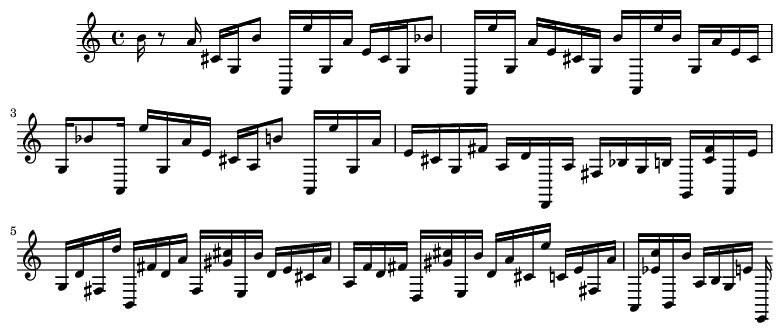

<music21.stream.Stream 0x7b9cf689cf50>

In [39]:
# Example: Create a Melody from a snippet of the Corpus
Melody_Snippet = chords_n_notes_with_durations(Corpus[:100])

# Show the music sheet and play the music
show_and_play_with_durations(Melody_Snippet)

In [41]:
sym_tuples = sorted(list(set(Corpus))) # Vocabulary of unique (event, duration) TUPLES
n_event_tuple_vocab = len(sym_tuples) # This is your n_event_vocab for the generator


#         # Mappings: (event_string, duration_float) tuple <-> integer index
mapping_tuples = dict((event_tuple, i) for i, event_tuple in enumerate(sym_tuples))
reverse_mapping_tuples = dict((i, event_tuple) for i, event_tuple in enumerate(sym_tuples)) # This is your int_to_event_map

print(f'mapping_tuples: {mapping_tuples}')
print(f'reverse_mapping_tuples: {reverse_mapping_tuples}')

print(f"Vocabulary of (event,duration) tuples size (n_event_vocab): {n_event_tuple_vocab}")


mapping_tuples: {('A1', 0.25): 0, ('A1', 0.3333333333333333): 1, ('A1', 0.5): 2, ('A1', 0.6666666666666666): 3, ('A1', 1.0): 4, ('A1', 1.5): 5, ('A1', 2.3333333333333335): 6, ('A1', 3.0): 7, ('A1', 4.0): 8, ('A1', 7.0): 9, ('A1.A2', 0.25): 10, ('A1.A2', 0.5): 11, ('A1.A2', 0.75): 12, ('A1.A2', 1.0): 13, ('A1.A2', 1.5): 14, ('A1.A2', 2.0): 15, ('A1.A2', 3.0): 16, ('A1.A2', 4.0): 17, ('A1.B-1', 0.25): 18, ('A1.D2.A2', 1.0): 19, ('A1.E2', 0.25): 20, ('A1.E2', 0.5): 21, ('A1.E2', 3.75): 22, ('A1.E2.A2', 0.25): 23, ('A1.E2.A2', 0.75): 24, ('A1.E2.A2', 1.0): 25, ('A1.E2.A2', 2.0): 26, ('A1.F2', 0.25): 27, ('A1.F2', 1.0): 28, ('A1.F2.A2', 2.0): 29, ('A2', 0.25): 30, ('A2', 0.3333333333333333): 31, ('A2', 0.5): 32, ('A2', 0.6666666666666666): 33, ('A2', 0.75): 34, ('A2', 1.0): 35, ('A2', 1.5): 36, ('A2', 1.75): 37, ('A2', 2.0): 38, ('A2', 3.0): 39, ('A2', 3.75): 40, ('A2', 4.0): 41, ('A2', 5.25): 42, ('A2.A3', 0.25): 43, ('A2.A3', 0.3333333333333333): 44, ('A2.A3', 0.5): 45, ('A2.A3', 1.0): 46

In [44]:
sequence_length = 40 # Your 'length' variable
features = []    # List of integer sequences for X
targets = []     # List of integer targets for y

# Iterate through Corpus_tuples_for_model to create sequences
for i in range(0, len(Corpus) - sequence_length, 1):
    feature_tuple_sequence = Corpus[i : i + sequence_length]
    target_tuple = Corpus[i + sequence_length]

    features.append([mapping_tuples[event_tuple] for event_tuple in feature_tuple_sequence])
    targets.append(mapping_tuples[target_tuple])

data_ = len(targets)
print(f"Number of sequences created: {data_}")

Number of sequences created: 71226


In [45]:
# Normalize
X = (np.reshape(features, (data_, sequence_length, 1))) / float(len(sym_tuples))
y = tensorflow.keras.utils.to_categorical(targets)

In [46]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = Sequential()

# Bidirectional LSTM Layer 1
model.add(Bidirectional(LSTM(512, return_sequences=True, recurrent_dropout=0.2),
                        input_shape=(X.shape[1], X.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# LSTM Layer 2
model.add(LSTM(256, return_sequences=True, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# LSTM Layer 3
model.add(LSTM(128))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully Connected Dense Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(y.shape[1], activation='softmax'))

# Compile model
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [47]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 40, 1024)       │     2,105,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 1024)       │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 40, 256)        │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4796)           │     1,232,572 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,885,436 (18.64 MB)

 Trainable params: 4,882,620 (18.63 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [48]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50)


Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 93s 347ms/step - accuracy: 0.0604 - loss: 6.9784
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 135s 341ms/step - accuracy: 0.0730 - loss: 6.3906
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 340ms/step - accuracy: 0.0750 - loss: 6.3110
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - accuracy: 0.0728 - loss: 6.2591
Epoch 5/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 91s 401ms/step - accuracy: 0.0758 - loss: 6.1514
Epoch 6/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 130s 346ms/step - accuracy: 0.0747 - loss: 6.1049
Epoch 7/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 76s 342ms/step - accuracy: 0.0762 - loss: 6.0249
Epoch 8/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 81s 339ms/step - accuracy: 0.0754 - loss: 5.9586
Epoch 9/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 340ms/step - accuracy: 0.0775 - loss: 5.8883
Epoch 10/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 342ms/step - accuracy: 0.0812 - loss: 5.7938
Epoch 11/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 75s 335ms/step - accuracy: 0.0830 - loss: 5.7014
Epoch 12/50
223/2

In [73]:
model.save('task1_model.keras')

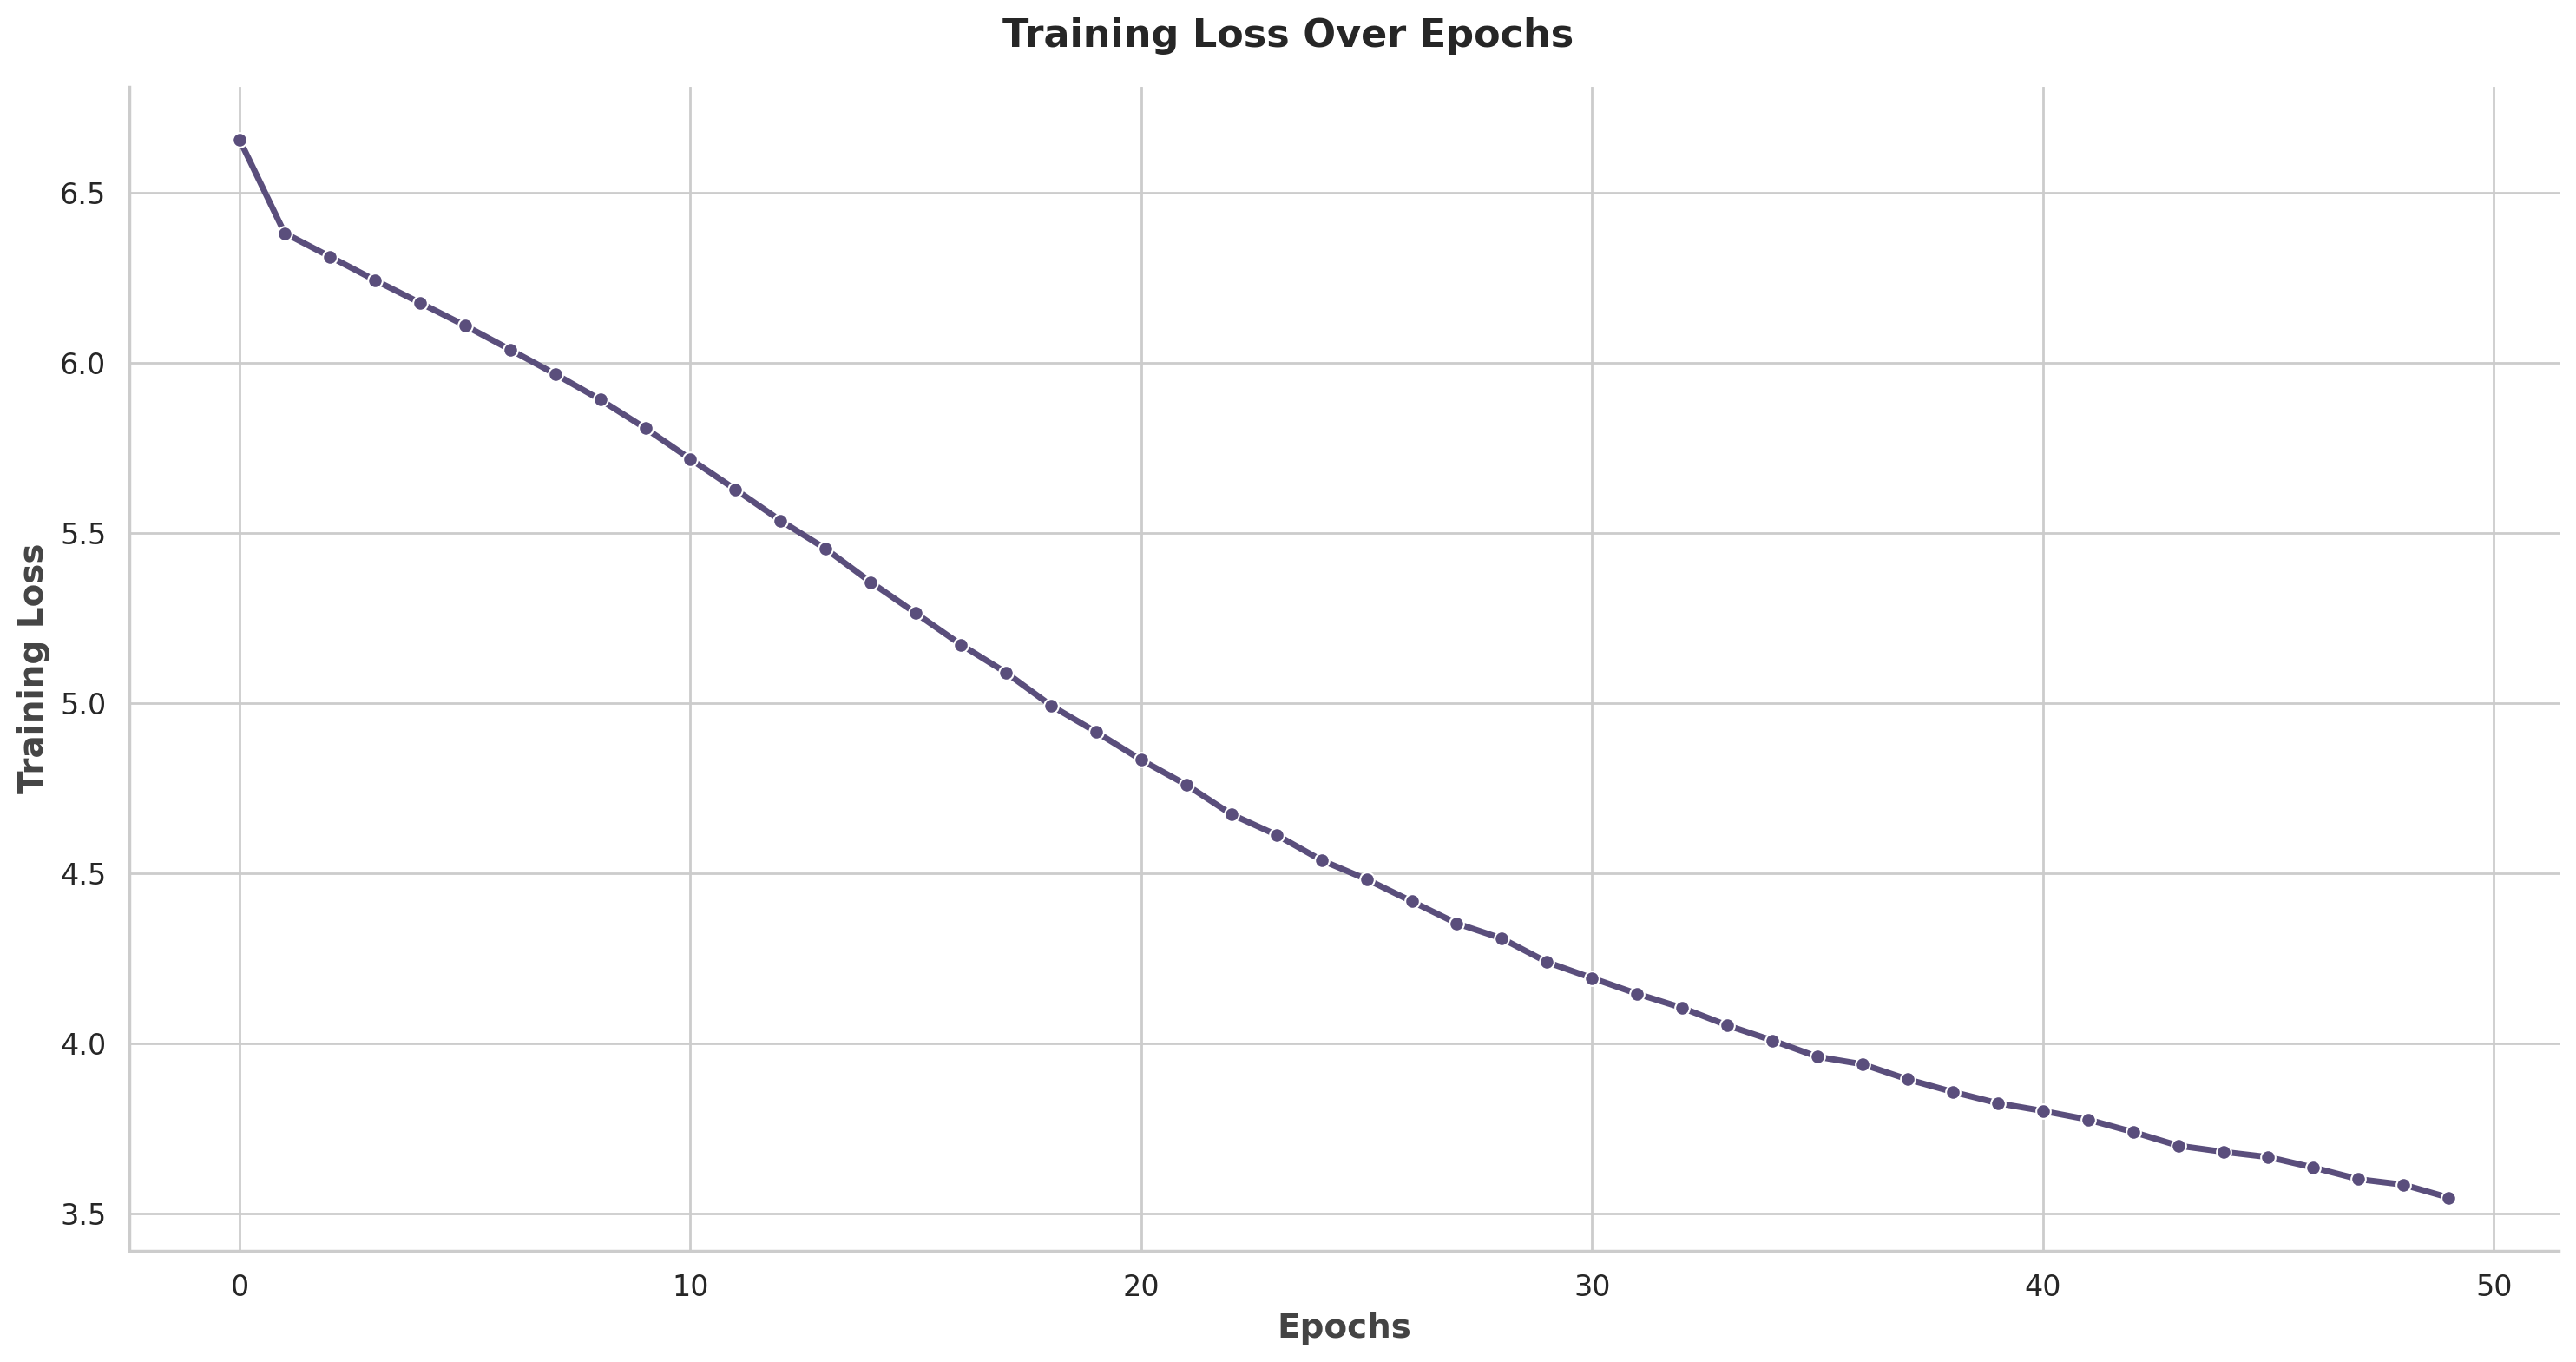

In [49]:
history_df = pd.DataFrame(history.history)
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(15, 8),)
fig.suptitle("Training Loss Over Epochs", fontsize=16, fontweight='bold')
ax = sns.lineplot(
    data=history_df["loss"],
    linewidth=2.5,
    color="#5A4E7C",
    marker='o',
    markersize=6
)
ax.set_xlabel("Epochs", fontsize=14, fontweight='semibold', color="#444444")
ax.set_ylabel("Training Loss", fontsize=14, fontweight='semibold', color="#444444")
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [62]:
def events_and_durations_to_stream(snippet_of_event_duration_tuples: list):
    melody_stream = stream.Stream()
    current_offset = 0.0

    if not isinstance(snippet_of_event_duration_tuples, list):
        print(f"Warning: events_and_durations_to_stream expects a list, "
              f"but received type: {type(snippet_of_event_duration_tuples)}. Returning an empty stream.")
        return melody_stream

    for item_tuple_from_generator in snippet_of_event_duration_tuples:
        actual_event_string = None
        actual_event_duration = None

        # Check if the item from the generator is a tuple of length 2 (outer tuple)
        if isinstance(item_tuple_from_generator, tuple) and len(item_tuple_from_generator) == 2:
            event_representation_from_map = item_tuple_from_generator[0] # This could be a string or another tuple
            default_duration_from_generator = item_tuple_from_generator[1] # This is the generator's default duration

            # Scenario 1: event_representation_from_map is ('event_str', original_duration)
            # This happens if int_to_event_map was built from (event, duration) tuples.
            if isinstance(event_representation_from_map, tuple) and len(event_representation_from_map) == 2 and \
               isinstance(event_representation_from_map[0], str) and \
               isinstance(event_representation_from_map[1], (int, float, fractions.Fraction)):

                actual_event_string = event_representation_from_map[0]
                actual_event_duration = event_representation_from_map[1] # Use original duration from the map

            # Scenario 2: event_representation_from_map is just 'event_str'
            # This happens if int_to_event_map was built from event strings only.
            elif isinstance(event_representation_from_map, str):
                actual_event_string = event_representation_from_map
                actual_event_duration = default_duration_from_generator # Use generator's default duration

            else:
                print(f"Warning: Unexpected structure for event_representation_from_map: "
                      f"{event_representation_from_map} (type: {type(event_representation_from_map)}) "
                      f"within item_tuple_from_generator: {item_tuple_from_generator}. Skipping.")
                continue
        else:
            print(f"Warning: Expected each item from generator to be a tuple of length 2 (outer structure), "
                  f"but got: {item_tuple_from_generator} (type: {type(item_tuple_from_generator)}). Skipping.")
            continue

        # Validate and convert actual_event_duration
        if isinstance(actual_event_duration, fractions.Fraction):
            actual_event_duration = float(actual_event_duration)

        if not (isinstance(actual_event_duration, (int, float)) and actual_event_duration > 0):
            print(f"Warning: Invalid or non-positive actual_event_duration '{actual_event_duration}' for event '{actual_event_string}'. "
                  f"Using default 0.5.")
            actual_event_duration = 0.5

        # Create music21 element
        element_to_add = None
        try:
            if actual_event_string is None:
                 print(f"Warning: actual_event_string is None. Skipping.")
                 continue

            if "." in actual_event_string: # Voiced Chord string
                pitch_names = actual_event_string.split(".")
                notes_for_chord = [note.Note(pn) for pn in pitch_names]
                if notes_for_chord: element_to_add = chord.Chord(notes_for_chord)
            elif "rest" == actual_event_string.lower(): # Rest string
                element_to_add = note.Rest()
            elif actual_event_string: # Single Note string
                element_to_add = note.Note(actual_event_string)
            else:
                print(f"Warning: Empty actual_event_string. Skipping.")
                continue
        except Exception as e:
            print(f"Warning: Could not create music21 element from string '{actual_event_string}': {e}. Skipping.")
            continue

        if element_to_add:
            try:
                # MODIFIED LINE: Use music21.duration.Duration directly
                element_to_add.duration = music21.duration.Duration(actual_event_duration)
            except Exception as e_dur:
                print(f"Warning: Could not set duration {actual_event_duration} for element {actual_event_string}: {e_dur}. Using 0.5.")
                element_to_add.duration.quarterLength = 0.5

            melody_stream.insert(current_offset, element_to_add)
            # Increment by the duration that was actually set on the element
            current_offset += element_to_add.duration.quarterLength

    return melody_stream

def display_and_play_stream(input_data, play_midi=True):
    melody_midi_stream = None
    if isinstance(input_data, stream.Stream): melody_midi_stream = input_data
    elif isinstance(input_data, list): melody_midi_stream = events_and_durations_to_stream(input_data)
    else:
        print(f"Error: display_and_play_stream received an invalid input type: {type(input_data)}. "
              f"Expected list of (event, duration) tuples or a music21.stream.Stream.")
        return None
    if not melody_midi_stream or not melody_midi_stream.elements:
        print("Info: The music stream is empty or could not be generated. Nothing to show or play.")
        return melody_midi_stream
    try:
        with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_png_file_obj:
            temp_png_filename = temp_png_file_obj.name
        try:
            actual_png_path = melody_midi_stream.write("lily.png", fp=temp_png_filename)
            if actual_png_path and os.path.exists(actual_png_path): display(Image(filename=str(actual_png_path)))
            else: melody_midi_stream.show('lily.png')
        except Exception as e_lily:
             print(f"Lilypond display error: {e_lily}. Trying MuseScore for image...")
             try:
                  actual_png_path = melody_midi_stream.write("musicxml.png", fp=temp_png_filename)
                  if actual_png_path and os.path.exists(actual_png_path): display(Image(filename=str(actual_png_path)))
                  else: melody_midi_stream.show('musicxml.png')
             except Exception as e_musescore: print(f"MuseScore display error: {e_musescore}. Score image display failed.")
        finally:
            if os.path.exists(temp_png_filename):
                try: os.remove(temp_png_filename)
                except Exception: pass
    except Exception as e_display: print(f"General score image display error: {e_display}.")
    if play_midi:
        try: melody_midi_stream.show('midi')
        except Exception as e_midi: print(f"MIDI playback error: {e_midi}.")
    return melody_midi_stream


In [63]:
print("First fifty values in the Corpus:", Corpus[:50])


First fifty values in the Corpus: [('B4', 0.25), ('rest', 0.5), ('A4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B-4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B4', 0.25), ('A2', 0.25), ('E5', 0.25), ('B4', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('B-4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('A3', 0.25), ('B4', 0.5), ('A2', 0.25), ('E5', 0.25), ('G3', 0.25), ('A4', 0.25), ('E4', 0.25), ('C#4', 0.25), ('G3', 0.25), ('F#4', 0.25), ('A3', 0.25), ('D4', 0.25), ('D2', 0.25)]


In [64]:
def display_and_play_stream(input_data, play_midi=True):
    # This function remains the same, it correctly calls the (now modified)
    # events_and_durations_to_stream if input_data is a list.
    melody_midi_stream = None
    if isinstance(input_data, stream.Stream): melody_midi_stream = input_data
    elif isinstance(input_data, list): melody_midi_stream = events_and_durations_to_stream(input_data)
    else:
        print(f"Error: display_and_play_stream received an invalid input type: {type(input_data)}. "
              f"Expected list of (event, duration) tuples or a music21.stream.Stream.")
        return None
    if not melody_midi_stream or not melody_midi_stream.elements:
        print("Info: The music stream is empty or could not be generated. Nothing to show or play.")
        return melody_midi_stream
    try:
        with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_png_file_obj:
            temp_png_filename = temp_png_file_obj.name
        try:
            actual_png_path = melody_midi_stream.write("lily.png", fp=temp_png_filename)
            if actual_png_path and os.path.exists(actual_png_path): display(Image(filename=str(actual_png_path)))
            else: melody_midi_stream.show('lily.png')
        except Exception as e_lily:
             print(f"Lilypond display error: {e_lily}. Trying MuseScore for image...")
             try:
                  actual_png_path = melody_midi_stream.write("musicxml.png", fp=temp_png_filename)
                  if actual_png_path and os.path.exists(actual_png_path): display(Image(filename=str(actual_png_path)))
                  else: melody_midi_stream.show('musicxml.png')
             except Exception as e_musescore: print(f"MuseScore display error: {e_musescore}. Score image display failed.")
        finally:
            if os.path.exists(temp_png_filename):
                try: os.remove(temp_png_filename)
                except Exception: pass # Best effort to clean up
    except Exception as e_display: print(f"General score image display error: {e_display}.")
    if play_midi:
        try: melody_midi_stream.show('midi')
        except Exception as e_midi: print(f"MIDI playback error: {e_midi}.")
    return melody_midi_stream

In [65]:
# --- 3. Music Generation Function ---
# This function's logic for how it uses int_to_event_map and appends to
# generated_event_duration_tuples is correct for this scenario.
def Generator_EventsOnly(model, seed_sequence_1d: list,
                         sequence_length: int, int_to_event_map: dict, n_event_vocab: int,
                         num_events_to_generate: int = 100, temperature: float = 1.0, default_duration: float = 0.5):
    if len(seed_sequence_1d) != sequence_length:
        raise ValueError(f"Seed sequence must have length {sequence_length}, got {len(seed_sequence_1d)}")
    current_pattern_list = list(seed_sequence_1d)
    generated_event_duration_tuples = []
    print("Generating music (events only, with default duration)...")
    for _ in range(num_events_to_generate):
        prediction_input = np.array(current_pattern_list).reshape(1, sequence_length, 1)
        pred_event_probs = model.predict(prediction_input, verbose=0)[0]
        if temperature > 0 and temperature != 1.0:
            pred_event_probs_temp = np.log(pred_event_probs + 1e-8) / temperature
            exp_preds_event = np.exp(pred_event_probs_temp)
            pred_event_probs = exp_preds_event / np.sum(exp_preds_event)
        pred_event_probs = pred_event_probs / np.sum(pred_event_probs)
        try:
            next_event_index = np.random.choice(len(pred_event_probs), p=pred_event_probs)
        except ValueError as e:
            print(f"ValueError during np.random.choice: {e}. Probabilities: {pred_event_probs}. Using argmax.")
            next_event_index = np.argmax(pred_event_probs)

        next_event_representation = int_to_event_map.get(next_event_index, "rest")

        if not isinstance(next_event_representation, str) and \
           not (isinstance(next_event_representation, tuple) and len(next_event_representation) == 2 and isinstance(next_event_representation[0], str)):
            # This condition means it's neither a string nor a valid (event_str, duration_val) tuple from the map
            print(f"CRITICAL WARNING: 'int_to_event_map' (your 'reverse_mapping') returned an unexpected value: "
                  f"{next_event_representation} (type: {type(next_event_representation)}) for index {next_event_index}. "
                  f"Expected a string or an (event_string, duration_value) tuple. "
                  f"Please FIX your vocabulary/mapping creation. Defaulting event part to 'rest'.")
            # If it's a malformed tuple, we can't reliably get event string or duration.
            # So, we create a simple ('rest', default_duration) for events_and_durations_to_stream
            generated_event_duration_tuples.append(("rest", default_duration))
        else:
            # If next_event_representation is a string OR a valid (event_str, original_dur) tuple,
            # append it along with the generator's default_duration.
            # events_and_durations_to_stream will then pick the correct duration.
            generated_event_duration_tuples.append((next_event_representation, default_duration))

        next_input_value_normalized = next_event_index / float(n_event_vocab)
        current_pattern_list.append(next_input_value_normalized)
        current_pattern_list = current_pattern_list[1:]
    print(f"Generated {len(generated_event_duration_tuples)} events.")
    melody_stream = events_and_durations_to_stream(generated_event_duration_tuples)
    if melody_stream and melody_stream.elements:
        print("Displaying and playing generated music...")
        display_and_play_stream(melody_stream)
    else:
        print("Generated melody stream is empty.")
    return generated_event_duration_tuples, melody_stream

In [67]:
import fractions

----------------------------------Generation 0----------------------------------

Using 1D seed pattern (length 40): [0.1663886572143453, 0.5008340283569641, 0.17848206839032527, 0.17952460383653043, 0.4288990825688073, 0.914512093411176, 0.1663886572143453, 0.4288990825688073, 0.1793160967472894, 0.4288990825688073]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


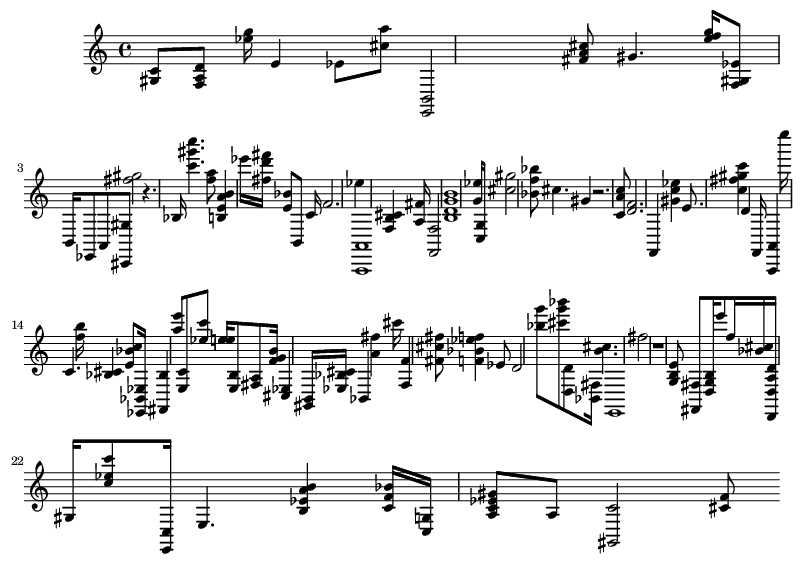

MIDI file saved as: task1_generated_music_version0.mid
----------------------------------Generation 1----------------------------------

Using 1D seed pattern (length 40): [0.10216847372810675, 0.1371976647206005, 0.10279399499582986, 0.3849040867389491, 0.10258548790658882, 0.9628857381150959, 0.10195996663886572, 0.8859466221851543, 0.8348623853211009, 0.9924937447873228]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


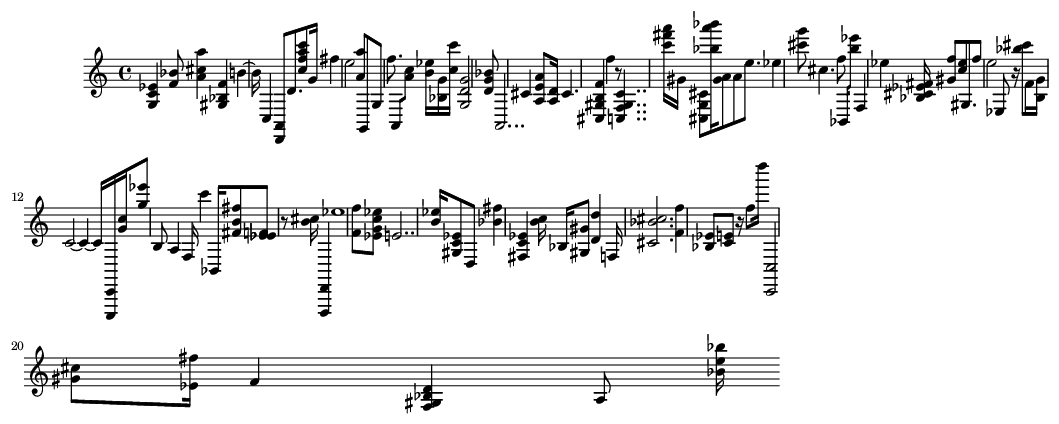

MIDI file saved as: task1_generated_music_version1.mid
----------------------------------Generation 2----------------------------------

Using 1D seed pattern (length 40): [0.4078398665554629, 0.8371559633027523, 0.22831526271893243, 0.6426188490408674, 0.4078398665554629, 0.9810258548790659, 0.8208924103419516, 0.463302752293578, 0.7354045037531276, 0.7904503753127606]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


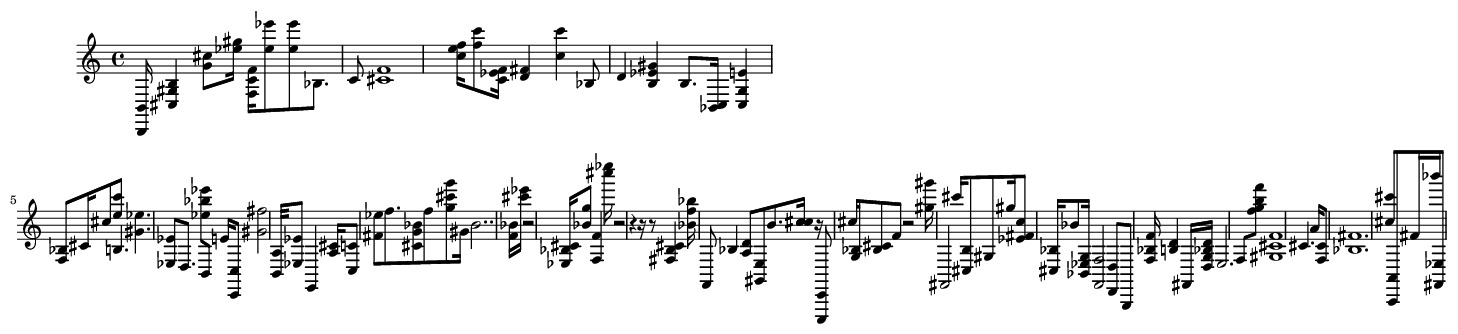

MIDI file saved as: task1_generated_music_version2.mid
----------------------------------Generation 3----------------------------------

Using 1D seed pattern (length 40): [0.994370308590492, 0.25, 0.17952460383653043, 0.23185988323603002, 0.1974562135112594, 0.25020850708924103, 0.994370308590492, 0.25, 0.11592994161801501, 0.6482485404503753]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


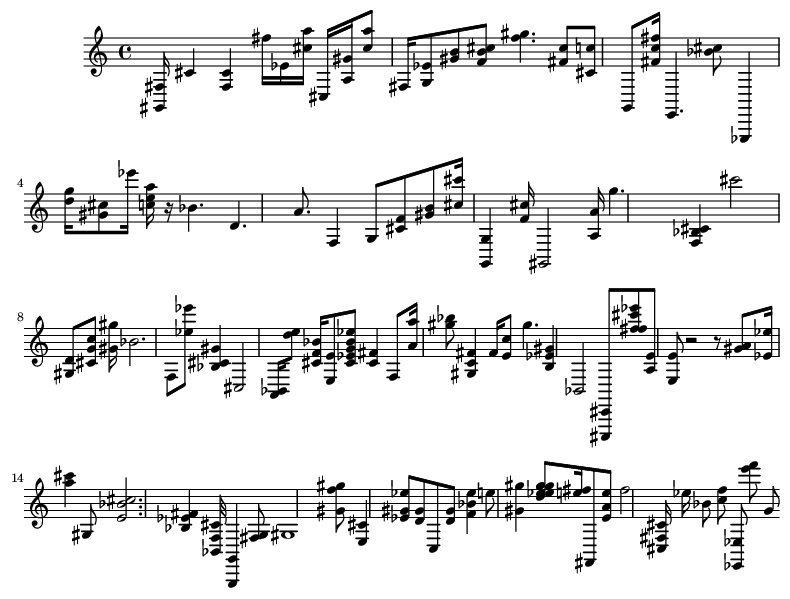

MIDI file saved as: task1_generated_music_version3.mid
----------------------------------Generation 4----------------------------------

Using 1D seed pattern (length 40): [0.17952460383653043, 0.23185988323603002, 0.1974562135112594, 0.25020850708924103, 0.994370308590492, 0.25, 0.11592994161801501, 0.6482485404503753, 0.11592994161801501, 0.25020850708924103]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


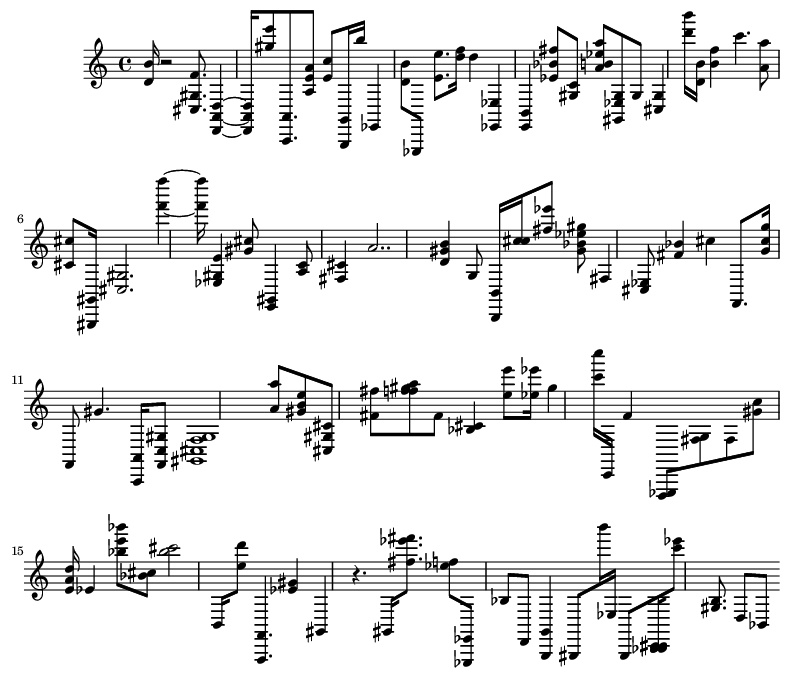

MIDI file saved as: task1_generated_music_version4.mid
----------------------------------Generation 5----------------------------------

Using 1D seed pattern (length 40): [0.7518765638031694, 0.7518765638031694, 0.13427856547122602, 0.9937447873227689, 0.0823603002502085, 0.9924937447873228, 0.4526688907422852, 0.9924937447873228, 0.604045037531276, 0.7433277731442869]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


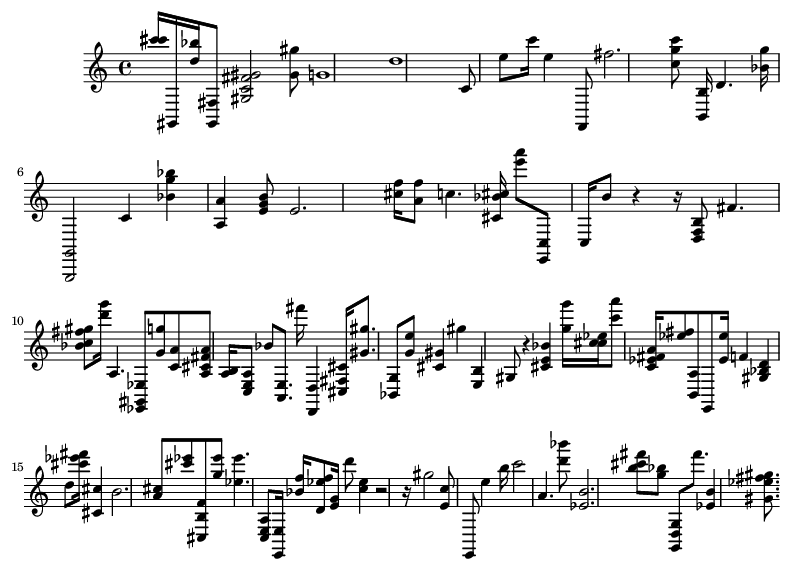

MIDI file saved as: task1_generated_music_version5.mid
----------------------------------Generation 6----------------------------------

Using 1D seed pattern (length 40): [0.4881150959132611, 0.2608423686405338, 0.23936613844870724, 0.512718932443703, 0.3317347789824854, 0.603419516263553, 0.871768140116764, 0.0823603002502085, 0.8213094245204337, 0.7666805671392828]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


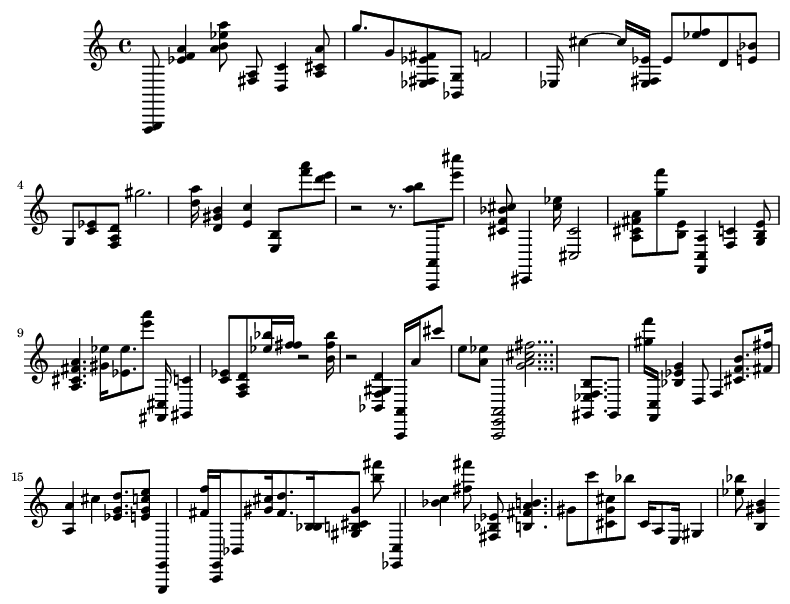

MIDI file saved as: task1_generated_music_version6.mid
----------------------------------Generation 7----------------------------------

Using 1D seed pattern (length 40): [0.9924937447873228, 0.36259382819015845, 0.013135946622185155, 0.9924937447873228, 0.36634695579649706, 0.4172226855713094, 0.4351542952460384, 0.9924937447873228, 0.44203502919099247, 0.41117597998331945]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


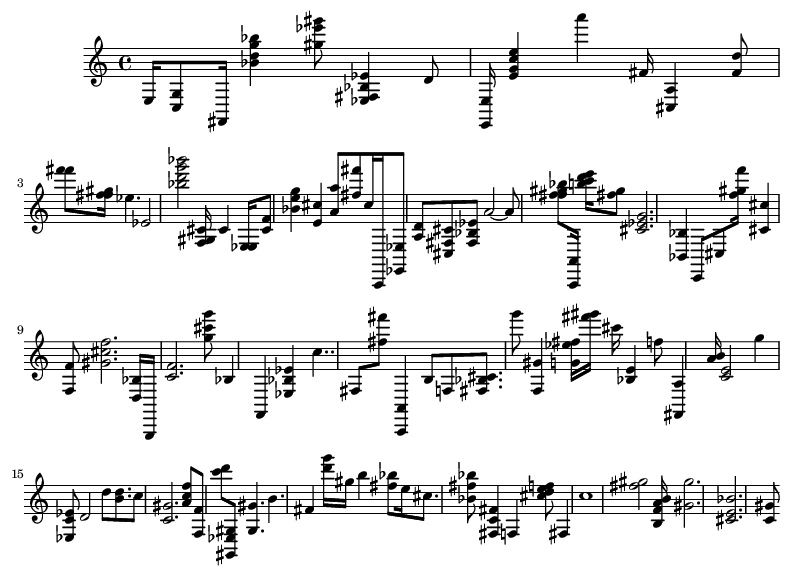

MIDI file saved as: task1_generated_music_version7.mid
----------------------------------Generation 8----------------------------------

Using 1D seed pattern (length 40): [0.591534612176814, 0.041701417848206836, 0.994370308590492, 0.20225187656380317, 0.041701417848206836, 0.8698915763135947, 0.591326105087573, 0.9931192660550459, 0.9931192660550459, 0.04190992493744787]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


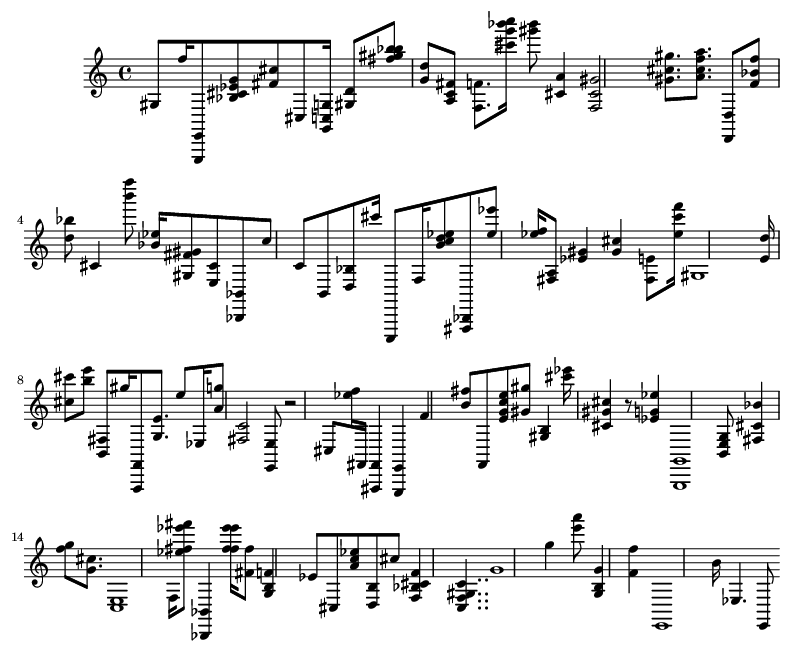

MIDI file saved as: task1_generated_music_version8.mid
----------------------------------Generation 9----------------------------------

Using 1D seed pattern (length 40): [0.4597581317764804, 0.6303169307756463, 0.45954962468723937, 0.3751042535446205, 0.3621768140116764, 0.33798999165971644, 0.9599666388657214, 0.9380733944954128, 0.38740617180984155, 0.3621768140116764]...
Generating music (events only, with default duration)...
Generated 100 events.
Displaying and playing generated music...


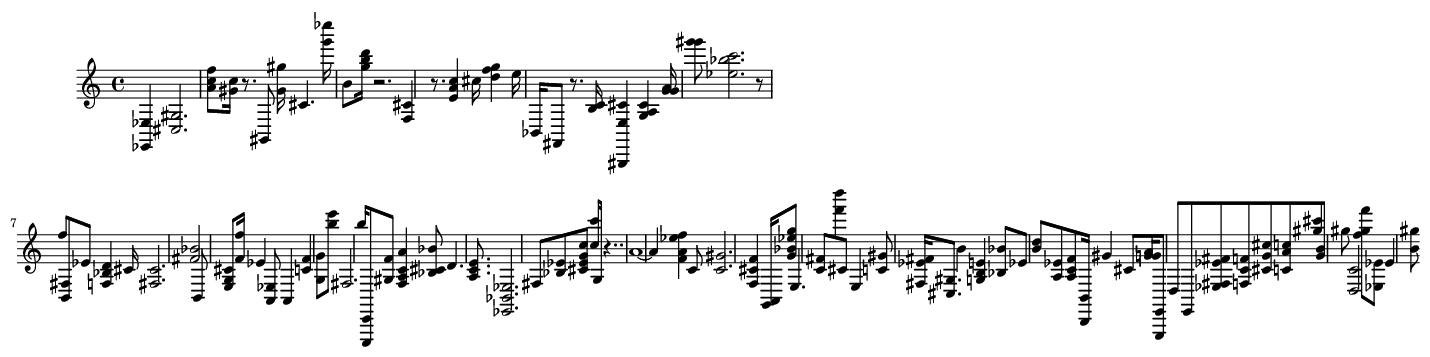

MIDI file saved as: task1_generated_music_version9.mid


In [80]:
for i in range(10):
  print(f'----------------------------------Generation {i}----------------------------------')
  seed_idx = np.random.randint(0, len(X_test))
  initial_seed_1d = X_test[seed_idx].flatten().tolist()

  print(f"\nUsing 1D seed pattern (length {len(initial_seed_1d)}): {initial_seed_1d[:10]}...")

  # Use the variables from THIS data preparation section
  # 'length' becomes 'sequence_length' for the generator call.
  # 'reverse_mapping_tuples' becomes 'int_to_event_map'.
  # 'n_event_tuple_vocab' becomes 'n_event_vocab' for the generator call.
  generated_tuples, generated_melody_stream = Generator_EventsOnly(
      model=model,
      seed_sequence_1d=initial_seed_1d,
      sequence_length=sequence_length,        # Your 'length' variable from data prep
      int_to_event_map=reverse_mapping_tuples,# Your map from int to (event_str, original_dur)
      n_event_vocab=n_event_tuple_vocab,     # Your vocab size of (event,duration) tuples
      num_events_to_generate=100,
      temperature=4.5,
      default_duration=0.5 # This is used if map returns a string or malformed tuple
  )
  output_midi_filename = f"task1_generated_music_version{i}.mid"
  generated_melody_stream.write('midi', fp=output_midi_filename)
  print(f"MIDI file saved as: {output_midi_filename}")

In [76]:
# generated_melody_stream.show('midi')

In [77]:
# Assuming 'generated_melody_stream' is your music21.stream.Stream object
output_midi_filename = "task1_generated_music1.mid"
generated_melody_stream.write('midi', fp=output_midi_filename)
print(f"MIDI file saved as: {output_midi_filename}")

MIDI file saved as: task1_generated_music1.mid
